In [1]:
#---------------------- Header 
from easydict import EasyDict
import os
import json
args = EasyDict()


#------ gpu
args.gpu_id = 0

#------ model 
args.img_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3A_20230523045050_45040_00039701_L1G_PS/0-Pusan-2023-AO_21_K3A_20230523045050_45040_00039701_L1G_PS.png"
print( '/'.join( args.img_path.split("/")[0:-1]) )
args.infer_threshold = 0.5
source_root ='/'.join( args.img_path.split("/")[0:-1])
args.img_output = args.img_path.replace(".png" ,"_output_v1.png")

#------ AIS csv 
args.data_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개/202305231300_dynamic.csv"
args.static_data_path = args.data_path.replace("_dynamic.csv","_static.csv")
args.final_merge = args.img_path.replace(".png",".csv")

# time
args.year_= 2023
args.month_ = 5 
args.day_ = 23
hour_ = 4 
args.hour_ = hour_ + 9
args.min  = 50
args.sec =  50

# time gap
# 시각화 결과물에서 ais 좌표가 해상도가 더 높아지게 된다. 
args.time_gap_min = 5
args.time_gap_sec = False

# pixel gap 
# this is for visualization
args.pixel_gap = 200

# # latlon gap 
# # 매칭되는 박스와 ais 간의 기준 => 늘리면 R_ 데이터프레임에서 매칭 케이스가 늘어나게 된다. 
# args.latlon_gap = 0.000001

#------ Coordinates filtering function
args.txt_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3A_20230523045050_45040_00039701_L1G_PS/1RCoordinate.txt"

#------ TIF 
args.tf_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3A_20230523045050_45040_00039701_L1G_PS/K3A_20230523045050_45040_00039701_L1G_PRGB.tif"


#------ Model Inference 
args.model_test = False


# Save EasyDict to a file
file_path = os.path.join(source_root ,"config.json" )
with open(file_path, 'w') as json_file:
    json.dump(args, json_file, indent=4)

/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3A_20230523045050_45040_00039701_L1G_PS


In [1]:
#---------------------- Header 
from easydict import EasyDict
import os
import json
args = EasyDict()
args.xml_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS/K3_20231028043354_61071_09341261_L1G_Aux.xml"

In [6]:
import xml.etree.ElementTree as ET

xml_path = args.xml_path
tree = ET.parse(args.xml_path)
root = tree.getroot() 


In [7]:
root = tree.getroot() # 해당 트리의 root를 반환

In [8]:
root

<Element 'Auxiliary' at 0x7f44b89913b0>

In [3]:
# K3_20231028043354_61071_09341262_L1G_Aux.xml 파일에
# </ImagingCoordinates> 정보가 있네요 !
# TL, TC, TR은 상단 좌, 중, 우 좌표를 의미하는 것 같고,
# BL, BC, BR은 하단 좌, 중, 우 좌표를 의미하는 것 같습니당 !

In [29]:
root.tag, root.attrib

('Auxiliary',
 {'{http://www.w3.org/2001/XMLSchema-instance}noNamespaceSchemaLocation': 'LevelProductSchema.xsd'})

In [88]:
# XML parsing

Top_left = []
Bottom_right = []

for child in root:
    if child.tag =="Image":
        print(child)
        for grand_child in child:
            if grand_child.tag =="PAN":
                for gg_child in grand_child:
                    #print(gg_child.tag)
                    if gg_child.tag == "ImagingCoordinates":
                        for ggg in gg_child:
                            
                            if ggg.tag =="ImageGeogTL":
                                print(ggg.tag)                         
                                print(ggg[0].text)
                                print(ggg[1].text)
                                Top_left.append(float(ggg[0].text))
                                Top_left.append(float(ggg[1].text))
                            elif ggg.tag == "ImageGeogBR":
                                print(ggg.tag)                         
                                print(ggg[0].text)
                                print(ggg[1].text)
                                Bottom_right.append(float(ggg[0].text))
                                Bottom_right.append(float(ggg[1].text))
                            

<Element 'Image' at 0x7f44b84594f0>
ImageGeogTL
35.032614576
128.632902263
ImageGeogBR
34.852878881
128.904069499


In [89]:
Top_left

[35.032614576, 128.632902263]

In [90]:
Bottom_right

[34.852878881, 128.904069499]

In [28]:
for child in root:
    print(child.tag, child.text)

General 
    
Metadata 
    
Image 
    


In [25]:
for child in root:
    if child.tag == "Image":
        
        print(child.tag)
        #print(child.tag)
        child.tag.

Image


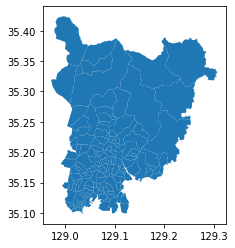

In [14]:
#-----------------------------------
import geopandas as gpd
from shapely.geometry import Point
import numpy as np 
gdf=gpd.GeoDataFrame.from_file('/mnt/hdd/eric/.tmp_ipy/00.Data/Shape/map.shp') #shapefile 불러오기
#gdf=gpd.read_file('/mnt/hdd/eric/.tmp_ipy/00.Data/Shape/map.shp') #shapefile 불러오기

gpd.GeoSeries(gdf['geometry']).plot() #shapefile 플랏
check=gdf['geometry'].contains(Point(129.05,35.15)) #특정 좌표 (long,lat)이 shapefile 다각형에 포함되는지 확인하기
checkt=np.where(check == True)[0] #해당 좌표를 포함하는(True) 다각형이 있는지 확인하기

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (985958400 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


#-------------------- 772
{0}
{1}
{2}
{3}
{4}
{5}
{6}
{7}
{8}
{9}
{10}
{11}
{12}
{13}
{14}
{15}
{16}
{17}
{18}
{19}
{20}
{21}
{22}
{23}
{24}
{25}
{26}
{27}
{28}
{29}
{30}
{31}
{32}
{33}
{34}
{35}
{36}
{37}
{38}
{39}
{40}
{41}
{42}
{43}
{44}
{45}
{46}
{47}
{48}
{49}
{50}
{51}
{52}
{53}
{54}
{55}
{56}
{57}
{58}
{59}
{60}
{61}
{62}
{63}
{64}
{65}
{66}
{67}
{68}
{69}
{70}
{71}
{72}
{73}
{74}
{75}
{76}
{77}
{78}
{79}
{80}
{81}
{82}
{83}
{84}
{85}
{86}
{87}
{88}
{89}
{90}
{91}
{92}
{93}
{94}
{95}
{96}
{97}
{98}
{99}
{100}
{101}
{102}
{103}
{104}
{105}
{106}
{107}
{108}
{109}
{110}
{111}
{112}
{113}
{114}
{115}
{116}
{117}
{118}
{119}
{120}
{121}
{122}
{123}
{124}
{125}
{126}
{127}
{128}
{129}
{130}
{131}
{132}
{133}
{134}
{135}
{136}
{137}
{138}
{139}
{140}
{141}
{142}
{143}
{144}
{145}
{146}
{147}
{148}
{149}
{150}
{151}
{152}
{153}
{154}
{155}
{156}
{157}
{158}
{159}
{160}
{161}
{162}
{163}
{164}
{165}
{166}
{167}


KeyboardInterrupt: 

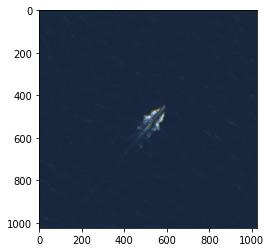

In [29]:
#---- Chip Set making 
import os 
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#----- load 
img_path = args.img_path
M_ = pd.read_csv(args.final_merge)


img_part = Image.open(img_path)
prefix_ = args.img_path.split("/")[-1].replace(".png","")

print("#--------------------",len(M_))
for i,row in M_.iterrows():

    if row["ais time"] != str(0):
        print({i})
        box_ = row
        x = box_["bbox x coord"]
        y = box_["bbox y coord"]
        width =  box_["bbox width"]
        height = box_["bbox height"]
        angle_ = box_["bbox angle"]

        pixel_slice = 512
        a_ = img_part.crop(( x-pixel_slice , y-pixel_slice, x+pixel_slice , y+pixel_slice ))
        #plt.figure(figsize=(18,18))
        
        folder_ = "/mnt/hdd/eric/.tmp_ipy/00.Data/Chips_v2"
        saved_name = f"{prefix_}_{i}.png"
        
        
        #plt.figure(figsize=(18,18))
        #plt.savefig(os.path.join(folder_,saved_name),dpi =600 )
        a_.save(os.path.join(folder_,saved_name))
        plt.imshow(a_)
    

In [24]:
M_

,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,26522.8070,17990.4650,262.008940,51.298306,0.248208,26365,18024,35.165670,129.350277,023-10-02 10:51:3
1,8257.3040,19619.2300,26.857403,10.156816,-1.046059,8084,19726,35.158243,129.249882,023-10-02 10:56:5
2,4361.9140,18554.2170,124.692696,23.508621,-1.028711,4308,18556,35.163562,129.229165,023-10-02 10:55:4
3,8668.2700,14602.0610,14.941326,9.923876,-1.560672,8695,14774,35.180565,129.253305,023-10-02 10:55:1
4,15796.2440,21846.7620,87.745270,23.790434,-0.952160,15837,21693,35.149282,129.292413,023-10-02 10:55:4
...,...,...,...,...,...,...,...,...,...,...
144,4076.0908,6185.4170,184.297120,31.105425,-0.616431,0,0,0.000000,0.000000,0
145,3915.8190,11491.9160,19.108774,6.754956,0.403343,0,0,0.000000,0.000000,0
146,4484.2603,5197.4690,24.226524,6.307145,-0.902495,0,0,0.000000,0.000000,0
147,3243.5344,7474.8340,17.701742,6.472270,-1.252228,0,0,0.000000,0.000000,0


In [13]:
M_.iloc[1000]['ais time'] == 0

False

In [14]:
for i,row in M_.iterrows():
    

    if row["ais time"] != str(0):
        print({i})

{0}
{1}
{2}
{3}
{4}
{5}
{6}
{7}
{8}
{9}
{10}
{11}
{12}
{13}
{14}
{15}
{16}
{17}


# 1. Model Inference

In [8]:
import testModule

if args.model_test:
    result = testModule.infer_model(input_file_path=args.img_path,\
                        thres=args.infer_threshold )

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/mmdet/models/dense_heads/anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '


load checkpoint from local path: /mnt/hdd/eric/.tmp_ipy/00.Checkpoint/ship_tmp/epoch_9.pth


/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/mmdet/models/dense_heads/anchor_head.py:123: UserWarning: DeprecationWarning: anchor_generator is deprecated, please use "prior_generator" instead
  warnings.warn('DeprecationWarning: anchor_generator is deprecated, '


In [10]:
#------------------------
# result save
import numpy as np
import os 
save_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/Inference_results"
file_name = args.img_path.split("/")[-1].split(".")[0]+".npy"    

if args.model_test == False:
    result = np.load(os.path.join(save_root,file_name))
else:
    print("Result Saved")
    np.save(os.path.join(save_root,file_name), result)

Result Saved


# 2. AIS csv 

In [15]:
#--------- import dynamic df 

import pandas as pd

df = pd.read_csv(args.data_path)

In [16]:
df

,mmsi_,time,lon_,lat_,heading_,turn_,speed_
0,440031780,2023-01-11 10:00:00,129.050863,35.123518,511,-128.0,0.0
1,440216410,2023-01-11 10:00:00,129.050085,35.123078,511,-128.0,0.0
2,440101370,2023-01-11 10:00:00,129.064133,35.126133,324,0.0,0.0
3,440111320,2023-01-11 10:00:00,129.116220,35.083763,259,127.0,8.8
4,440300740,2023-01-11 10:00:00,129.124815,35.083297,511,-128.0,8.9
...,...,...,...,...,...,...,...
40906,440017100,2023-01-11 10:59:59,129.073892,35.037897,28,-128.0,8.8
40907,440111320,2023-01-11 10:59:59,129.070780,35.098173,313,-128.0,0.1
40908,273399580,2023-01-11 10:59:59,129.064543,35.098195,29,-128.0,0.0
40909,440033880,2023-01-11 10:59:59,129.052705,35.125098,511,-128.0,0.0


In [17]:
#--------- import static df 

static_df = pd.read_csv(args.static_data_path)

In [18]:
static_df

,mmsi_,ship_name,ship_type,to_bow,to_stern,to_port,to_starboard
0,440704000,ORYONG NO.715,30,33,23,7,2
1,0,NaN,0,0,0,0,0
2,311957000,PERUVIAN REEFER,70,114,26,19,1
3,440107530,HAEYANG HWANGKYUNG 2,53,12,20,2,4
4,440314380,HA GEN HO,0,0,0,0,0
...,...,...,...,...,...,...,...
279,440151030,NEW DONGSIN,80,40,13,4,5
280,440053750,17 YU SUNG,0,0,0,0,0
281,440119800,META NO3,52,10,12,4,4
282,538009586,YOKOHAMA TRADER,70,133,15,18,6


In [19]:
df

,mmsi_,time,lon_,lat_,heading_,turn_,speed_
0,440031780,2023-01-11 10:00:00,129.050863,35.123518,511,-128.0,0.0
1,440216410,2023-01-11 10:00:00,129.050085,35.123078,511,-128.0,0.0
2,440101370,2023-01-11 10:00:00,129.064133,35.126133,324,0.0,0.0
3,440111320,2023-01-11 10:00:00,129.116220,35.083763,259,127.0,8.8
4,440300740,2023-01-11 10:00:00,129.124815,35.083297,511,-128.0,8.9
...,...,...,...,...,...,...,...
40906,440017100,2023-01-11 10:59:59,129.073892,35.037897,28,-128.0,8.8
40907,440111320,2023-01-11 10:59:59,129.070780,35.098173,313,-128.0,0.1
40908,273399580,2023-01-11 10:59:59,129.064543,35.098195,29,-128.0,0.0
40909,440033880,2023-01-11 10:59:59,129.052705,35.125098,511,-128.0,0.0


In [20]:
set( [i for i in static_df['mmsi_']] ).__len__(),set( [i for i in df['mmsi_']] ).__len__()

(284, 446)

In [188]:
# static_df.columns = ['mmsi_static', 'ship_name', 'ship_type', 'to_bow', 'to_stern', 'to_port',
#        'to_starboard']

In [21]:
A_ = pd.merge(df,static_df,  on='mmsi_', how='left')

In [22]:
A_ = A_.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)


In [23]:
df.iloc[55:68]

,mmsi_,time,lon_,lat_,heading_,turn_,speed_
55,440008570,2023-01-11 10:00:05,129.061638,35.099175,511,-128.0,0.0
56,440110910,2023-01-11 10:00:05,129.099990,35.086615,99,-23.0,6.9
57,440112730,2023-01-11 10:00:05,129.066620,35.108678,192,0.0,0.1
58,373126000,2023-01-11 10:00:05,129.056845,35.118543,38,0.0,0.0
59,440152720,2023-01-11 10:00:05,129.092657,35.047445,511,-128.0,9.6
60,440150220,2023-01-11 10:00:05,129.100468,35.046275,511,-128.0,9.7
61,440138700,2023-01-11 10:00:06,129.050598,35.119717,69,0.0,0.0
62,311703000,2023-01-11 10:00:06,129.188593,34.883398,296,0.0,11.2
63,440135870,2023-01-11 10:00:06,129.052647,35.125488,202,0.0,0.0
64,273444730,2023-01-11 10:00:06,129.058567,35.049755,235,0.0,0.1


In [24]:
A_.iloc[55:68]

,mmsi_,time,lon_,lat_,heading_,turn_,speed_,ship_name,ship_type,to_bow,to_stern,to_port,to_starboard
55,440008570,2023-01-11 10:00:05,129.061638,35.099175,511,-128.0,0.0,JANGBOGO1HO,0.0,0.0,0.0,0.0,0.0
56,440110910,2023-01-11 10:00:05,129.099990,35.086615,99,-23.0,6.9,KOREA NO.7,52.0,10.0,28.0,4.0,4.0
57,440112730,2023-01-11 10:00:05,129.066620,35.108678,192,0.0,0.1,JIN DAL LAE,52.0,12.0,16.0,3.0,5.0
58,373126000,2023-01-11 10:00:05,129.056845,35.118543,38,0.0,0.0,SKY FLOWER,70.0,113.0,33.0,18.0,5.0
59,440152720,2023-01-11 10:00:05,129.092657,35.047445,511,-128.0,9.6,SAM SUNG HO,80.0,35.0,7.0,4.0,4.0
60,440150220,2023-01-11 10:00:05,129.100468,35.046275,511,-128.0,9.7,505 DAE PUNG HO,0.0,18.0,8.0,5.0,5.0
61,440138700,2023-01-11 10:00:06,129.050598,35.119717,69,0.0,0.0,SKY STAR,80.0,0.0,0.0,0.0,0.0
62,311703000,2023-01-11 10:00:06,129.188593,34.883398,296,0.0,11.2,MAGNA,70.0,104.0,10.0,18.0,1.0
63,440135870,2023-01-11 10:00:06,129.052647,35.125488,202,0.0,0.0,BUSANIVDM,51.0,10.0,22.0,4.0,3.0
64,273444730,2023-01-11 10:00:06,129.058567,35.049755,235,0.0,0.1,ARGI,90.0,31.0,54.0,13.0,7.0


In [25]:
len(df),len(A_)

(40911, 40911)

In [26]:
static_df[static_df["mmsi_"]==441178000 ]

,mmsi_,ship_name,ship_type,to_bow,to_stern,to_port,to_starboard


In [27]:
#-------------- 중복검사
tmp_ = []
for i in range((len(A_))):
    mmsi_df = df.iloc[i]['mmsi_']
    mmsi_aa = A_.iloc[i]['mmsi_']
    
    if mmsi_df != mmsi_aa: 
        tmp_.append(i)
        #print(i) 

#--- data copy 
df = A_

In [28]:
#---- current time ----#
import datetime
year_= args.year_
month_ = args.month_ 
day_ = args.day_
hour_ = args.hour_
min  = args.min
sec =  args.sec
crit_time_str = f"{year_}-{month_}-{day_} {hour_}:{min}:{sec}"
date = pd.to_datetime(crit_time_str)
print(date)

#---- time gap ----#
time_gap_min = args.time_gap_min
time_gap_sec = args.time_gap_sec

earl_time = date - datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)
post_time = date + datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)

print(earl_time)
print(post_time)

2023-01-11 10:51:12
2023-01-11 10:50:12
2023-01-11 10:52:12


In [29]:
#---- filtering datetime ---# 
#df.columns = ["mmsi", "time", "long", "lat", "heading", "turn", "speed"]
df.columns =['mmsi', 'time', 'long', 'lat', 'heading', 'turn', 'speed',
            'ship_name', 'ship_type', 'to_bow', 'to_stern', 'to_port',
            'to_starboard']


#---------------------------------------------- by Eric 1120
time_ = []
for i,row in df.iterrows():
    time_.append( pd.to_datetime( row["time"] ) )
df["datetime"] = time_
#----------------------------------------------

con1 = df["datetime"] < post_time 
con2 = df["datetime"] > earl_time

#--- exec ---#
time_filter_flag = True

if time_filter_flag:
    t_df = df.loc[con1 & con2] 
    df.loc[con1 & con2]
else:
    t_df = df

# 3. Coordinates filtering

In [30]:
# Coordinates filtering function ! 

txt_path = args.txt_path
f = open(txt_path,'r')
lines = f.readlines()

top_left =     lines[1]
bottom_right = lines[-1]

min_long = float( top_left.split(":")[1].split(",")[1][0:10] )
max_long = float( bottom_right.split(":")[1].split(",")[1][0:10] ) 

min_lat  = float( bottom_right.split(":")[1].split(",")[0][0:10] ) 
max_lat  = float( top_left.split(":")[1].split(",")[0][0:10] ) 

In [31]:
con1 = t_df["long"] > min_long
con2 = t_df["long"] < max_long

con3 = t_df["lat"] > min_lat
con4 = t_df["lat"] < max_lat + 0.0225 # debugged by eric 


#------------------------------------
location_filter_flag = True

if location_filter_flag == True:
    #q_df = df.loc[con1 & con2 & con3 & con4]
    q_df = t_df.loc[con1 & con2 & con3 & con4]
    q_df
else:
    q_df = df

In [33]:
# xy => find coordinates in TIFF 
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
import numpy as np 


img_path  = args.img_path 

img_ = Image.open(img_path)

np.array(img_).shape

(28840, 29400, 4)

In [34]:
# from latlon_utm_pixel

#def latlon_utm_pixel( values_):

import utm
import rasterio
#sample_points['lat'].values
#sample_points

#-------------------------
utm_array =[] # long lat 


#--- csv 
# latlong --> utm
for lat,lon in zip(q_df['lat'].values,q_df['long'].values):
    #print(lat)
    if lat < 80:
        res = utm.from_latlon(lat,lon,52,"N")
        utm_array.append(res)


pixels_=[]

#--- tf 
# utm --> pixels

tf_path = args.tf_path
with rasterio.open(tf_path) as map_layer:

    for inp in utm_array:
    
        coords2pixels = map_layer.index(inp[0],inp[1]) #input lon,lat # 좌표계 
        pixels_.append(coords2pixels)
        #pixels2coords = map_layer.xy(-0.5,-0.5)  #input px, py


In [35]:
from adjustText import adjust_text

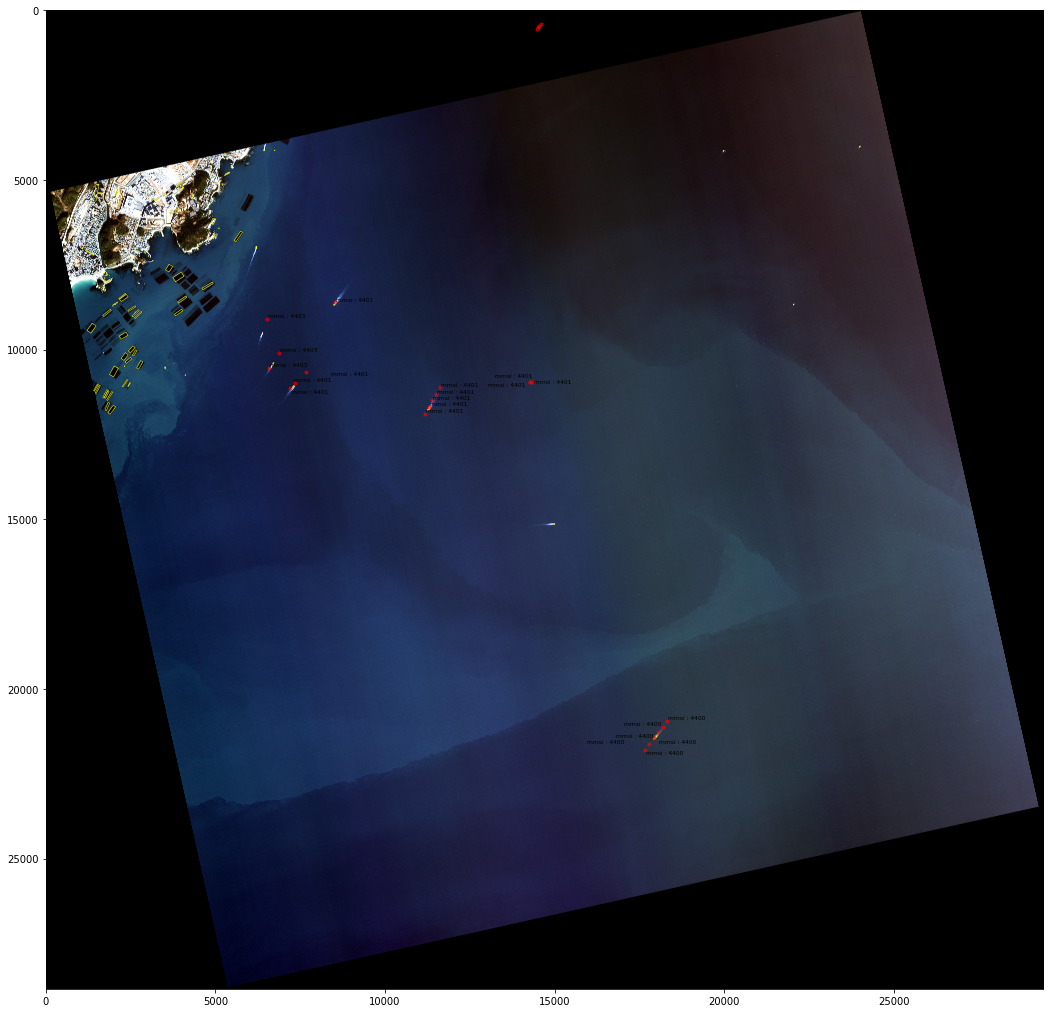

In [38]:
#------------------------------
# AIS matching 

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image


# Box Matching 
img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
plt.imshow(img_)

ax = plt.gca()


#----------------------
# result confidence filtering 해야함 
#----------------------


# Bounding Box 
# Threshold 이상 선박

bboxes_ = [] 
cnt = 0
for r in result[0]:
    if r[-1] > args.infer_threshold:
        cnt+=1
        bboxes_.append(r)
#result[0][-1][-1]


for box_ in bboxes_:
    x = box_[0]
    y = box_[1]
    width = box_[2]
    height = box_[3]
    angle_ = box_[4]

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 

    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.5, edgecolor="yellow", fill=False,
                                 rotation_point="center",
                                 angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)

# XY 

# function
# Coordinates to Pixel 
# Pixel to Coordinates 


#----- AIS Label -----# 
x_v = np.array( [i[1] for i in pixels_] ) # x,y 좌표 포지션 변경 
y_v = np.array( [i[0] for i in pixels_] )



#--------------------------------------------
label_option = True


plt.scatter(x_v,y_v, alpha=0.5,color='red',marker='o',s=10)

plt_txts = []

if label_option:
    cnt = 0 
    for x,y in zip(x_v, y_v):
        
        a = str( q_df['lat'].values[cnt] )[0:6]
        b = str( q_df['long'].values[cnt] )[0:6]
        c = str(q_df['mmsi'].values[cnt])[0:4]
        d = q_df['time'].values[cnt]
        e = q_df['heading'].values[cnt]
        f = q_df['turn'].values[cnt]


        name = f'lat : {a} long : {b} mmsi : {c} time : {d} heading : {e} turn : {f}'
        #name = f'lat : {a} long : {b} mmsi : {c}'
        #name = f'lat : {a} long : {b}'
        #name = f"mmsi : {c}"
        cnt +=1 
        #plt.text(x, y, name, fontsize =6, rotation=30) 
        plt_txts.append( plt.text(x, y, name, fontsize =6) )

#---- overlap avoid 
adjust_text(plt_txts)


#x_v = [5361]
#y_v = [1996]
plt.savefig(args.img_output,dpi =1200 )
plt.show()

# Bounding Box to Pixel 

In [127]:
# A_ = pd.DataFrame( {"a" : [i[0] for i in box_coords],
# "b" : [i[1] for i in box_coords]} )

In [128]:
# A_.to_csv("tmp_2323_new.csv",index=False)

In [129]:
# bboxes_[0][0],

In [130]:

box_coords = []

tf_path = args.tf_path
with rasterio.open(tf_path) as map_layer:

    for box in bboxes_:
        #coords2pixels = map_layer.index(inp[0],inp[1]) #input lon,lat # 좌표계 
        #pixels_.append(coords2pixels)
        pixels2coords = map_layer.xy(box[1],box[0])  #input px, py # 찾았다. 

        # x,y 값만 pixel2coord 로 넘기고, 
        # 나머지 height, width, angle 은 나중에 데이터프레임에서 활용          
         
        _box = [pixels2coords[0],pixels2coords[1], box[2], box[3], box[4]] 
        
        #---
        # _box 
        box_coords.append(_box)

        

#----

box_latlon = []
for box_utn in box_coords:
    res = utm.to_latlon(box_utn[0],box_utn[1],52,"N")
    box_latlon.append([res[0],res[1], box_utn[2],box_utn[3],box_utn[4]  ])


In [131]:
# A_ = pd.DataFrame( {"lat" : [i[0] for i in box_latlon],
# "lon" : [i[1] for i in box_latlon]} )
# A_.to_csv("tmp_2323_new_latlon.csv",index=False)

In [132]:
#----- Matching BBox latlon with AIS latlon ------# 

In [133]:
box_latlon[0]
box_latlon[1]

# 129.054385,35.046984
# 129.052063,35.047640
# sampling 된거 기준으로 +- 0.002 

[35.00718842220755, 129.0448519173312, 92.39601, 20.180357, -0.64814395]

In [134]:
# # box lat lon 검증 
# E = { "lat_" : [i[0] for i in box_latlon],
# "lon_" : [i[1] for i in box_latlon] }

# E = pd.DataFrame(E)
# E.to_csv("tmp_1115.csv",index=False)

In [135]:
q_df.head()

,mmsi,time,long,lat,heading,turn,speed,ship_name,ship_type,to_bow,to_stern,to_port,to_starboard,datetime
38042,440115870,2022-12-27 10:50:56,129.077547,35.059735,511,-128.0,0.0,NO.5 EUNHASU,37.0,0.0,0.0,0.0,0.0,2022-12-27 10:50:56
38058,440156960,2022-12-27 10:50:57,129.061050,35.048633,511,-128.0,0.1,SUNGJIN ACE,80.0,19.0,10.0,4.0,3.0,2022-12-27 10:50:57
38061,440154440,2022-12-27 10:50:57,129.061855,35.059378,139,-127.0,7.3,BUSAN 503,79.0,0.0,0.0,0.0,0.0,2022-12-27 10:50:57
38062,440709700,2022-12-27 10:50:57,129.046325,35.031512,98,-127.0,0.1,MUSUNG,80.0,30.0,10.0,5.0,5.0,2022-12-27 10:50:57
38067,440033820,2022-12-27 10:50:58,129.029800,35.064237,511,-128.0,0.1,PS TRUST,0.0,0.0,0.0,0.0,0.0,2022-12-27 10:50:58


In [136]:
len(box_latlon)

53

In [137]:
#--- find Matching !! ---#
from collections import defaultdict

latlon_gap = args.latlon_gap 
tmp_pts = []


BBox = defaultdict()

#-----------------------------
# box latlon in detection results
for bx_ in box_latlon:
    bx_lat = bx_[0]
    bx_lon = bx_[1]
    bx_width = bx_[2]
    bx_height = bx_[3]
    bx_angle = bx_[4]

    box_a = f"{bx_lat},{bx_lon}"
    BBox[box_a] = []
    #---------------------------------
    # ais latlon in AIS csv
    for i,row in q_df.iterrows():
        ais_lat  = row['lat']
        ais_long = row['long']
        ais_time = row['datetime']

        # mmsi, to_bow, to_stern, to_port, to_starboard
        ais_mmsi = row['mmsi']
        ais_to_bow = row['to_bow']
        ais_to_stern = row['to_stern']
        ais_to_port  = row['to_port']
        ais_to_starboard = row['to_starboard']


        # Matching 
        if (bx_lat -latlon_gap < ais_lat < bx_lat + latlon_gap) & (bx_lon -latlon_gap < ais_long < bx_lon + latlon_gap):
            #print(row)
            tmp_pts.append( [ais_lat, ais_long,ais_time])

            # 매칭된 바운딩 박스를 저장 
            BBox[box_a].append([ais_lat, ais_long,ais_time, bx_width,bx_height,bx_angle, ais_mmsi,ais_to_bow,ais_to_stern, ais_to_port,ais_to_starboard ])
    
    #-------------------------------------------------------
    # Not Matching
    if BBox[box_a] == []:
        BBox[box_a].append(["No Matching AIS","No Matching AIS","No Matching AIS","No Matching AIS","No Matching AIS","No Matching AIS","No Matching AIS","No Matching AIS","No Matching AIS","No Matching AIS","No Matching AIS"] )
    
            
    

In [138]:
BBox.keys().__len__()

53

In [139]:
BBox

defaultdict(None,
            {'35.0205652697561,129.0622838967487': [['No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS']],
             '35.00718842220755,129.0448519173312': [['No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
               'No Matching AIS']],
             '35.01818780729535,129.04888376151706': [['No Matching AIS',
               'No Matching AIS',
               'No Matching AIS',
           

In [140]:
#--- make DataFrame 

tmp_ = []
for idx, key_ in enumerate( BBox.keys() ):
    for v in BBox[key_]:
        tmp_.append( [idx, key_,v] )

# for key_,value_ in BBox.items():
#     [key_ for i in len(value_)]

In [141]:
[i[2][3] for i in tmp_]

['No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',
 'No Matching AIS',


In [142]:
a = args.img_path

In [143]:
R_  =pd.DataFrame({
    "Satellite" : a.split("/")[-1].split(".")[0].split("_")[0],
    "Satellite_Image" : a.split("/")[-1].split(".")[0],
    "Satellite_Time" : date,
    "Ship_Index" : [i[0] for i in tmp_],

    #------------- Box 
    "Detected_Box_Coords" : [i[1] for i in tmp_],
    "Detected_Box_Width" : [i[2][3] for i in tmp_],
    "Detected_Box_Height" : [i[2][4] for i in tmp_],
    "Detected_Box_Angle" : [i[2][5] for i in tmp_],

    #------------- AIS
    "AIS_Time" : [i[2][2] for i in tmp_],
    "AIS_Coords" : [i[2][0:2] for i in tmp_],
    
    "AIS_mmsi" : [i[2][6] for i in tmp_],
    "AIS_to_bow" :  [i[2][7] for i in tmp_],
    "AIS_to_stern" :  [i[2][8] for i in tmp_],
    "AIS_to_port" :  [i[2][9] for i in tmp_],
    "AIS_to_starboard" :  [i[2][10] for i in tmp_],
    
    "Model Threshold" : args.infer_threshold,
    "LatLon Gap" : args.latlon_gap, 
    "Time gap btw imgNais" : args.time_gap_min
})
R_


,Satellite,Satellite_Image,Satellite_Time,Ship_Index,Detected_Box_Coords,Detected_Box_Width,Detected_Box_Height,Detected_Box_Angle,AIS_Time,AIS_Coords,AIS_mmsi,AIS_to_bow,AIS_to_stern,AIS_to_port,AIS_to_starboard,Model Threshold,LatLon Gap,Time gap btw imgNais
0,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,0,"35.0205652697561,129.0622838967487",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1
1,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,1,"35.00718842220755,129.0448519173312",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1
2,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,2,"35.01818780729535,129.04888376151706",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1
3,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,3,"35.03150270763248,129.04618744714088",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1
4,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,4,"35.05273006853529,129.05950070249142",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1
5,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,5,"35.03512499491338,129.05394163038156",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1
6,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,6,"35.05900401413515,129.05367555170992",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1
7,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,7,"35.00965419043542,129.0608514361656",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1
8,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,8,"35.00652590895833,129.0730424794113",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1
9,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,9,"35.05849057003709,129.04828757331288",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1


In [144]:
R_.iloc[[1,3,23,30]]

,Satellite,Satellite_Image,Satellite_Time,Ship_Index,Detected_Box_Coords,Detected_Box_Width,Detected_Box_Height,Detected_Box_Angle,AIS_Time,AIS_Coords,AIS_mmsi,AIS_to_bow,AIS_to_stern,AIS_to_port,AIS_to_starboard,Model Threshold,LatLon Gap,Time gap btw imgNais
1,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,1,"35.00718842220755,129.0448519173312",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1
3,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,3,"35.03150270763248,129.04618744714088",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1
23,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,23,"35.05408439196653,128.99993502615106",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1
30,C1,C1_20221227015155_09806_00006119_L1G_RGB_ver2,2022-12-27 10:51:55,30,"35.054547187701374,128.99986770383026",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,"[No Matching AIS, No Matching AIS]",No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,No Matching AIS,0.8,0.000005,1


In [145]:
[ i for i in R_['AIS_to_bow'].values if type(i) is not str ] 

[]

In [146]:
[ i for i in R_['AIS_to_stern'].values if type(i) is not str ] 

[]

In [147]:
R_.to_csv("R2_1254_.csv",index=False)

# Validate the Result ! 

In [148]:
# Validate the Result ! 

In [149]:
Z_ = pd.DataFrame( {
    'lat' : [i.split(",")[0] for i in R_["Detected_Box_Coords"]],
    'long' : [i.split(",")[1] for i in R_["Detected_Box_Coords"]] } )

In [150]:
Z_.to_csv("tmp_ship.csv",index=False)

In [151]:
[ i[0] for i in  R_["AIS_Coords"] if type(i[0]) is not str]

[]

In [152]:
S_ = pd.DataFrame( {
    'lat' :[ i[0] for i in  R_["AIS_Coords"] if type(i[0]) is not str],
    'long' : [ i[1] for i in  R_["AIS_Coords"] if type(i[0]) is not str] 
    } )

S_.to_csv("tmp_ais.csv",index=False)

In [153]:
# Q_ = {
#     'lat' :[ i[0] for i in tmp_pts],
#     'long' :  [ i[1] for i in tmp_pts]
# }

# Q_ = pd.DataFrame(Q_)

# Q_.to_csv("tmp_final_v1.csv",index=False)

In [154]:
box_latlon

[[35.0205652697561, 129.0622838967487, 96.75691, 20.105816, -0.96665734],
 [35.00718842220755, 129.0448519173312, 92.39601, 20.180357, -0.64814395],
 [35.01818780729535, 129.04888376151706, 112.080536, 18.148483, -1.3599516],
 [35.03150270763248, 129.04618744714088, 77.75062, 15.707102, -1.4906679],
 [35.05273006853529, 129.05950070249142, 67.25913, 11.462839, 0.3124429],
 [35.03512499491338, 129.05394163038156, 99.18595, 16.7065, 0.71949303],
 [35.05900401413515, 129.05367555170992, 67.62908, 12.801714, 0.2801864],
 [35.00965419043542, 129.0608514361656, 103.5031, 16.45212, -1.027753],
 [35.00652590895833, 129.0730424794113, 122.74397, 20.634602, -0.5851053],
 [35.05849057003709, 129.04828757331288, 75.19616, 11.66768, 0.2673322],
 [35.06370611462536, 129.05031231684703, 48.830368, 10.578865, 0.22677279],
 [35.04234119645649, 129.05631267137437, 88.92894, 16.553911, -0.18751979],
 [35.05700329230104, 129.04097490731002, 58.488228, 10.311331, 0.09281731],
 [35.01886768565068, 129.07484

In [155]:
box_latlon

[[35.0205652697561, 129.0622838967487, 96.75691, 20.105816, -0.96665734],
 [35.00718842220755, 129.0448519173312, 92.39601, 20.180357, -0.64814395],
 [35.01818780729535, 129.04888376151706, 112.080536, 18.148483, -1.3599516],
 [35.03150270763248, 129.04618744714088, 77.75062, 15.707102, -1.4906679],
 [35.05273006853529, 129.05950070249142, 67.25913, 11.462839, 0.3124429],
 [35.03512499491338, 129.05394163038156, 99.18595, 16.7065, 0.71949303],
 [35.05900401413515, 129.05367555170992, 67.62908, 12.801714, 0.2801864],
 [35.00965419043542, 129.0608514361656, 103.5031, 16.45212, -1.027753],
 [35.00652590895833, 129.0730424794113, 122.74397, 20.634602, -0.5851053],
 [35.05849057003709, 129.04828757331288, 75.19616, 11.66768, 0.2673322],
 [35.06370611462536, 129.05031231684703, 48.830368, 10.578865, 0.22677279],
 [35.04234119645649, 129.05631267137437, 88.92894, 16.553911, -0.18751979],
 [35.05700329230104, 129.04097490731002, 58.488228, 10.311331, 0.09281731],
 [35.01886768565068, 129.07484